# About Dataset

**Description**

Prognostics and health management is an important topic in industry for predicting state of assets to avoid downtime and failures. This data set is the Kaggle version of the very well known public data set for asset degradation modeling from NASA. It includes Run-to-Failure simulated data from turbo fan jet engines.

Engine degradation simulation was carried out using C-MAPSS. Four different were sets simulated under different combinations of operational conditions and fault modes. Records several sensor channels to characterize fault evolution. The data set was provided by the Prognostics CoE at NASA Ames.

**Prediction Goal**

In this dataset the goal is to predict the remaining useful life (RUL) of each engine in the test dataset. RUL is equivalent of number of flights remained for the engine after the last datapoint in the test dataset.

**Experimental Scenario**

Data sets consists of multiple multivariate time series. Each data set is further divided into training and test subsets. Each time series is from a different engine i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. There are three operational settings that have a substantial effect on engine performance. These settings are also included in the data. The data is contaminated with sensor noise.

The engine is operating normally at the start of each time series, and develops a fault at some point during the series. In the training set, the fault grows in magnitude until system failure. In the test set, the time series ends some time prior to system failure. The objective of the competition is to predict the number of remaining operational cycles before failure in the test set, i.e., the number of operational cycles after the last cycle that the engine will continue to operate. Also provided a vector of true Remaining Useful Life (RUL) values for the test data.

The data are provided as a zip-compressed text file with 26 columns of numbers, separated by spaces. Each row is a snapshot of data taken during a single operational cycle, each column is a different variable. The columns correspond to:

1) unit number
2) time, in cycles
3) operational setting 1
4) operational setting 2
5) operational setting 3
6) sensor measurement 1
7) sensor measurement 2
…
26) sensor measurement 26

**Data Set Organization**

    Data Set: FD001
    Train trjectories: 100
    Test trajectories: 100
    Conditions: ONE (Sea Level)
    Fault Modes: ONE (HPC Degradation)

    Data Set: FD002
    Train trjectories: 260
    Test trajectories: 259
    Conditions: SIX
    Fault Modes: ONE (HPC Degradation)

    Data Set: FD003
    Train trjectories: 100
    Test trajectories: 100
    Conditions: ONE (Sea Level)
    Fault Modes: TWO (HPC Degradation, Fan Degradation)

    Data Set: FD004
    Train trjectories: 248
    Test trajectories: 249
    Conditions: SIX
    Fault Modes: TWO (HPC Degradation, Fan Degradation)

**Reference**

Reference: A. Saxena, K. Goebel, D. Simon, and N. Eklund, Damage Propagation Modeling for Aircraft Engine Run-to-Failure Simulation, in the Proceedings of the 1st International Conference on Prognostics and Health Management (PHM08), Denver CO, Oct 2008.

Alternatively the dataset can be downloaded from https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/

# Data

In [3]:
import pandas as pd
import numpy as np

In [4]:
FD001_train = pd.read_csv('./data/nasa_turbofan/train_FD001.txt',sep=' ',header=None)

In [5]:
FD001_test = pd.read_csv('./data/nasa_turbofan/test_FD001.txt',sep= ' ', header=None)

In [6]:
def rename_columns(df, new_column_names):
    if len(new_column_names) != len(df.columns):
        raise ValueError("The number of new column names must match the number of columns in the dataframe.")
    
    df.columns = new_column_names
    return df

In [7]:
column_names = ['unit number','cycle',
                'setting 1','setting 2','setting 3']
for i in range(1,24):
    column_names.append(f'sensor_{i}')

In [8]:
rename_columns(FD001_train,column_names)
rename_columns(FD001_test,column_names)

unit number  cycle  setting 1  setting 2  setting 3  sensor_1  \
0                1      1     0.0023     0.0003      100.0    518.67   
1                1      2    -0.0027    -0.0003      100.0    518.67   
2                1      3     0.0003     0.0001      100.0    518.67   
3                1      4     0.0042     0.0000      100.0    518.67   
4                1      5     0.0014     0.0000      100.0    518.67   
...            ...    ...        ...        ...        ...       ...   
13091          100    194     0.0049     0.0000      100.0    518.67   
13092          100    195    -0.0011    -0.0001      100.0    518.67   
13093          100    196    -0.0006    -0.0003      100.0    518.67   
13094          100    197    -0.0038     0.0001      100.0    518.67   
13095          100    198     0.0013     0.0003      100.0    518.67   

       sensor_2  sensor_3  sensor_4  sensor_5  ...  sensor_14  sensor_15  \
0        643.02   1585.29   1398.21     14.62  ...    8125.55     8.4052   
1        641.71   1588.45   1395.42     14.62  ...    8139.62     8.3803   
2        642.46   1586.94   1401.34     14.62  ...    8130.10     8.4441   
3        642.44   1584.12   1406.42     14.62  ...    8132.90     8.3917   
4        642.51   1587.19   1401.92     14.62  ...    8129.54     8.4031   
...         ...       ...       ...       ...  ...        ...        ...   
13091    643.24   1599.45   1415.79     14.62  ...    8213.28     8.4715   
13092    643.22   1595.69   1422.05     14.62  ...    8210.85     8.4512   
13093    643.44   1593.15   1406.82     14.62  ...    8217.24     8.4569   
13094    643.26   1594.99   1419.36     14.62  ...    8220.48     8.4711   
13095    642.95   1601.62   1424.99     14.62  ...    8214.64     8.4903   

       sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  \
0           0.03        392       2388      100.0      38.86    23.3735   
1           0.03        393       2388      100.0      39.02    23.3916   
2           0.03        393       2388      100.0      39.08    23.4166   
3           0.03        391       2388      100.0      39.00    23.3737   
4           0.03        390       2388      100.0      38.99    23.4130   
...          ...        ...        ...        ...        ...        ...   
13091       0.03        394       2388      100.0      38.65    23.1974   
13092       0.03        395       2388      100.0      38.57    23.2771   
13093       0.03        395       2388      100.0      38.62    23.2051   
13094       0.03        395       2388      100.0      38.66    23.2699   
13095       0.03        396       2388      100.0      38.70    23.1855   

       sensor_22  sensor_23  
0            NaN        NaN  
1            NaN        NaN  
2            NaN        NaN  
3            NaN        NaN  
4            NaN        NaN  
...          ...        ...  
13091        NaN        NaN  
13092        NaN        NaN  
13093        NaN        NaN  
13094        NaN        NaN  
13095        NaN        NaN  

[13096 rows x 28 columns]

In [9]:
def remove_single_value_columns(df):
    columns_to_drop = [col for col in df.columns if df[col].nunique() == 1]
    df_cleaned = df.drop(columns=columns_to_drop,inplace=True)
    
    return df_cleaned

In [10]:
remove_single_value_columns(FD001_train)
remove_single_value_columns(FD001_test)

In [11]:
FD001_train.drop(FD001_train.columns[-2:len(FD001_train.columns)],axis = 1, inplace=True)
FD001_test.drop(FD001_test.columns[-2:len(FD001_test.columns)],axis = 1, inplace=True)

In [12]:
FD001_train.head()

unit number  cycle  setting 1  setting 2  sensor_2  sensor_3  sensor_4  \
0            1      1    -0.0007    -0.0004    641.82   1589.70   1400.60   
1            1      2     0.0019    -0.0003    642.15   1591.82   1403.14   
2            1      3    -0.0043     0.0003    642.35   1587.99   1404.20   
3            1      4     0.0007     0.0000    642.35   1582.79   1401.87   
4            1      5    -0.0019    -0.0002    642.37   1582.85   1406.22   

   sensor_6  sensor_7  sensor_8  sensor_9  sensor_11  sensor_12  sensor_13  \
0     21.61    554.36   2388.06   9046.19      47.47     521.66    2388.02   
1     21.61    553.75   2388.04   9044.07      47.49     522.28    2388.07   
2     21.61    554.26   2388.08   9052.94      47.27     522.42    2388.03   
3     21.61    554.45   2388.11   9049.48      47.13     522.86    2388.08   
4     21.61    554.00   2388.06   9055.15      47.28     522.19    2388.04   

   sensor_14  sensor_15  sensor_17  sensor_20  sensor_21  
0    8138.62     8.4195        392      39.06    23.4190  
1    8131.49     8.4318        392      39.00    23.4236  
2    8133.23     8.4178        390      38.95    23.3442  
3    8133.83     8.3682        392      38.88    23.3739  
4    8133.80     8.4294        393      38.90    23.4044

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
def constant_feature(df):
    constant_feature = []
    for col in df.columns:
            if abs(df[col].std() < 0.02):      # hint
                constant_feature.append(col)
    
    return constant_feature

In [15]:
cf = constant_feature(FD001_train)

In [16]:
FD001_train.drop(cf,axis=1, inplace=True)
FD001_test.drop(cf, axis=1, inplace=True)

In [17]:
def create_rul(df):
    unit_col = df.columns[0]
    cycle_col = df.columns[1]
    df['rul'] = df.groupby(unit_col)[cycle_col].transform('max') - df[cycle_col]
    return df

In [18]:
create_rul(FD001_train)

unit number  cycle  sensor_2  sensor_3  sensor_4  sensor_7  sensor_8  \
0                1      1    641.82   1589.70   1400.60    554.36   2388.06   
1                1      2    642.15   1591.82   1403.14    553.75   2388.04   
2                1      3    642.35   1587.99   1404.20    554.26   2388.08   
3                1      4    642.35   1582.79   1401.87    554.45   2388.11   
4                1      5    642.37   1582.85   1406.22    554.00   2388.06   
...            ...    ...       ...       ...       ...       ...       ...   
20626          100    196    643.49   1597.98   1428.63    551.43   2388.19   
20627          100    197    643.54   1604.50   1433.58    550.86   2388.23   
20628          100    198    643.42   1602.46   1428.18    550.94   2388.24   
20629          100    199    643.23   1605.26   1426.53    550.68   2388.25   
20630          100    200    643.85   1600.38   1432.14    550.79   2388.26   

       sensor_9  sensor_11  sensor_12  sensor_13  sensor_14  sensor_15  \
0       9046.19      47.47     521.66    2388.02    8138.62     8.4195   
1       9044.07      47.49     522.28    2388.07    8131.49     8.4318   
2       9052.94      47.27     522.42    2388.03    8133.23     8.4178   
3       9049.48      47.13     522.86    2388.08    8133.83     8.3682   
4       9055.15      47.28     522.19    2388.04    8133.80     8.4294   
...         ...        ...        ...        ...        ...        ...   
20626   9065.52      48.07     519.49    2388.26    8137.60     8.4956   
20627   9065.11      48.04     519.68    2388.22    8136.50     8.5139   
20628   9065.90      48.09     520.01    2388.24    8141.05     8.5646   
20629   9073.72      48.39     519.67    2388.23    8139.29     8.5389   
20630   9061.48      48.20     519.30    2388.26    8137.33     8.5036   

       sensor_17  sensor_20  sensor_21  rul  
0            392      39.06    23.4190  191  
1            392      39.00    23.4236  190  
2            390      38.95    23.3442  189  
3            392      38.88    23.3739  188  
4            393      38.90    23.4044  187  
...          ...        ...        ...  ...  
20626        397      38.49    22.9735    4  
20627        395      38.30    23.1594    3  
20628        398      38.44    22.9333    2  
20629        395      38.29    23.0640    1  
20630        396      38.37    23.0522    0  

[20631 rows x 17 columns]

In [19]:
corr_matrix = FD001_train.corr()

In [20]:
mask = np.tril(np.ones(corr_matrix.shape),k = -1).astype(bool)
corr_matrix = corr_matrix.where(mask)

<Axes: >

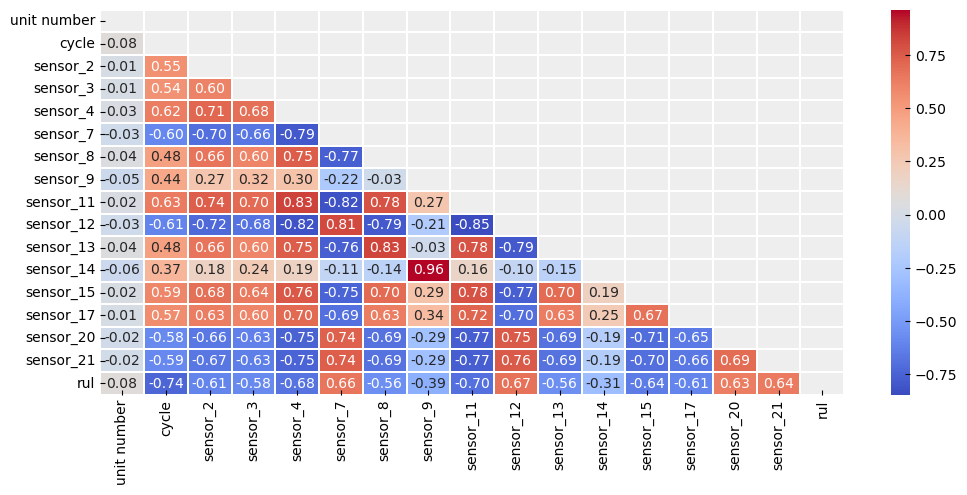

In [21]:
plt.style.use('bmh')
sns.set_style()
plt.figure(figsize = (12,5))
plt.grid()
sns.heatmap(corr_matrix,cmap='coolwarm',annot=True, fmt = '0.2f', linewidths=0.01)

In [22]:
FD001_train.drop('sensor_14',axis=1,inplace=True)
FD001_test.drop('sensor_14',axis=1,inplace=True)

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_sensors_vs_cycles(df, rolling_window):
    
    df = df.copy()
    sensor_columns = [col for col in df.columns if col.startswith('sensor_')]

    num_sensors = len(sensor_columns)
    fig, axes = plt.subplots(num_sensors, 1, figsize=(10, 4 * num_sensors))

    if num_sensors == 1:
        axes = [axes]

    for i, sensor in enumerate(sensor_columns):
        df[sensor + '_rolling'] = df.groupby('unit number')[sensor].transform(lambda x: x.rolling(rolling_window).mean())

        for unit in df['unit number'].unique():
            unit_data = df[df['unit number'] == unit]
            axes[i].plot(unit_data['rul'], unit_data[sensor], label=f'Unit {unit}', alpha=0.7)
        
        axes[i].set_title(f'Sensor: {sensor}')
        axes[i].set_xlabel('Remainded Usefull Life')
        axes[i].set_ylabel(f'{sensor} (Rolling)')
        # axes[i].legend(loc='upper right')
        axes[i].grid(True)

    plt.tight_layout()
    plt.show()

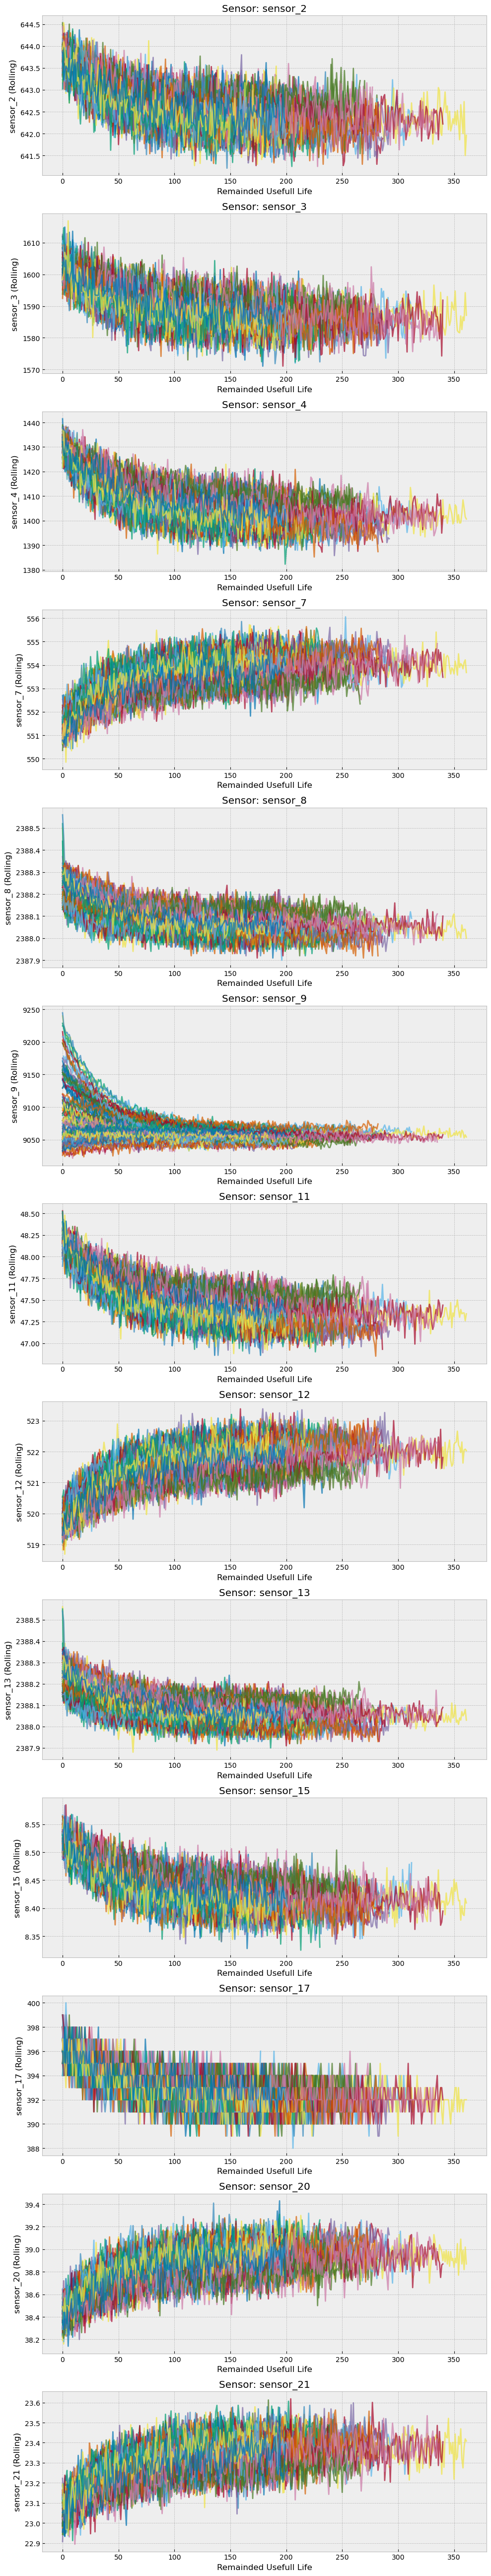

In [48]:
plot_sensors_vs_cycles(FD001_train,20)

## Feature selection

In [274]:
FD001_train.head()

unit number  cycle  sensor_2  sensor_3  sensor_4  sensor_7  sensor_8  \
0            1      1    641.82   1589.70   1400.60    554.36   2388.06   
1            1      2    642.15   1591.82   1403.14    553.75   2388.04   
2            1      3    642.35   1587.99   1404.20    554.26   2388.08   
3            1      4    642.35   1582.79   1401.87    554.45   2388.11   
4            1      5    642.37   1582.85   1406.22    554.00   2388.06   

   sensor_9  sensor_11  sensor_12  sensor_13  sensor_15  sensor_17  sensor_20  \
0   9046.19      47.47     521.66    2388.02     8.4195        392      39.06   
1   9044.07      47.49     522.28    2388.07     8.4318        392      39.00   
2   9052.94      47.27     522.42    2388.03     8.4178        390      38.95   
3   9049.48      47.13     522.86    2388.08     8.3682        392      38.88   
4   9055.15      47.28     522.19    2388.04     8.4294        393      38.90   

   sensor_21  rul  
0    23.4190  191  
1    23.4236  190  
2    23.3442  189  
3    23.3739  188  
4    23.4044  187

In [474]:
X_train = FD001_train.copy()
X_train.drop(['unit number','cycle'],axis=1,inplace=True)
y_train = X_train.pop('rul')

In [422]:
X_train.head()

sensor_2  sensor_3  sensor_4  sensor_7  sensor_8  sensor_9  sensor_11  \
0    641.82   1589.70   1400.60    554.36   2388.06   9046.19      47.47   
1    642.15   1591.82   1403.14    553.75   2388.04   9044.07      47.49   
2    642.35   1587.99   1404.20    554.26   2388.08   9052.94      47.27   
3    642.35   1582.79   1401.87    554.45   2388.11   9049.48      47.13   
4    642.37   1582.85   1406.22    554.00   2388.06   9055.15      47.28   

   sensor_12  sensor_13  sensor_15  sensor_17  sensor_20  sensor_21  
0     521.66    2388.02     8.4195        392      39.06    23.4190  
1     522.28    2388.07     8.4318        392      39.00    23.4236  
2     522.42    2388.03     8.4178        390      38.95    23.3442  
3     522.86    2388.08     8.3682        392      38.88    23.3739  
4     522.19    2388.04     8.4294        393      38.90    23.4044

In [476]:
X_test = FD001_test.copy()
# X_test.drop(['unit number','cycle'],axis=1,inplace=True)
y_test = pd.read_csv('./data/nasa_turbofan/RUL/RUL_FD001.txt',header=None)

In [426]:
X_test.head()

unit number  cycle  sensor_2  sensor_3  sensor_4  sensor_7  sensor_8  \
0            1      1    643.02   1585.29   1398.21    553.90   2388.04   
1            1      2    641.71   1588.45   1395.42    554.85   2388.01   
2            1      3    642.46   1586.94   1401.34    554.11   2388.05   
3            1      4    642.44   1584.12   1406.42    554.07   2388.03   
4            1      5    642.51   1587.19   1401.92    554.16   2388.01   

   sensor_9  sensor_11  sensor_12  sensor_13  sensor_15  sensor_17  sensor_20  \
0   9050.17      47.20     521.72    2388.03     8.4052        392      38.86   
1   9054.42      47.50     522.16    2388.06     8.3803        393      39.02   
2   9056.96      47.50     521.97    2388.03     8.4441        393      39.08   
3   9045.29      47.28     521.38    2388.05     8.3917        391      39.00   
4   9044.55      47.31     522.15    2388.03     8.4031        390      38.99   

   sensor_21  
0    23.3735  
1    23.3916  
2    23.4166  
3    23.3737  
4    23.4130

In [478]:
y_test = y_test.iloc[:,0].to_dict()
y_test = {k+1: v for k, v in y_test.items()}
X_test['rul'] = X_test['unit number'].map(y_test)

In [464]:
# X_test['rul'] = X_test['rul'] + X_test['cycle']

In [480]:
X_test = X_test.groupby('unit number').last().reset_index()

In [482]:
y_test = X_test.pop('rul')

In [484]:
X_test.drop(['unit number','cycle'],axis=1,inplace=True)

In [486]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [488]:
import xgboost as xgb

In [490]:
model = xgb.XGBRegressor()

In [492]:
model.fit(X_train,y_train, 
          eval_set=[(X_train,y_train),(X_test,y_test)],
          verbose=10,
         )

[0]	validation_0-rmse:57.27143	validation_1-rmse:40.68574
[10]	validation_0-rmse:39.33276	validation_1-rmse:33.21445
[20]	validation_0-rmse:37.72514	validation_1-rmse:34.51837
[30]	validation_0-rmse:36.35493	validation_1-rmse:34.79223
[40]	validation_0-rmse:35.33872	validation_1-rmse:35.11074
[50]	validation_0-rmse:33.94379	validation_1-rmse:35.15507
[60]	validation_0-rmse:32.86558	validation_1-rmse:36.04534
[70]	validation_0-rmse:31.93109	validation_1-rmse:37.46009
[80]	validation_0-rmse:31.11910	validation_1-rmse:37.50152
[90]	validation_0-rmse:30.28077	validation_1-rmse:37.85484
[99]	validation_0-rmse:29.48590	validation_1-rmse:37.64548


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [494]:
predictions = model.predict(X_test)

In [496]:
from sklearn.metrics import root_mean_squared_error, r2_score

def metrics(y_true , y_pred , label = 'test'):
    '''evaluate model , by taking y_true , y_pred and label of dataset'''
    
    rmse = root_mean_squared_error(y_true , y_pred)
    r2 = r2_score(y_true , y_pred)
    print(f'for {label} set , RMSE = {rmse:0.2f} , r2_score = {r2*100:0.2f}%')

In [498]:
metrics(y_test,predictions)
metrics(y_train, model.predict(X_train), 'train')

for test set , RMSE = 37.65 , r2_score = 17.93%
for train set , RMSE = 29.49 , r2_score = 81.67%


In [500]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

metrics(y_test,predictions)
metrics(y_train, model.predict(X_train), 'train')

for test set , RMSE = 52.20 , r2_score = -57.80%
for train set , RMSE = 0.00 , r2_score = 100.00%


In [502]:
from sklearn.linear_model import LinearRegression
model_linreg = LinearRegression()
model_linreg.fit(X_train , y_train)

y_pred = model_linreg.predict(X_train)
metrics(y_train , y_pred , label = 'train')

y_pred = model_linreg.predict(X_test)
metrics(y_test , y_pred , label = 'test')

for train set , RMSE = 44.69 , r2_score = 57.91%
for test set , RMSE = 32.20 , r2_score = 39.94%


In [504]:
from sklearn.ensemble import RandomForestRegressor
model_forest = RandomForestRegressor(random_state=42 , n_jobs=-1 )
model_forest.fit(X_train , y_train)

y_pred = model_forest.predict(X_train)
metrics(y_train , y_pred , label = 'train')

y_pred = model_forest.predict(X_test)
metrics(y_test , y_pred , label = 'test')

for train set , RMSE = 15.73 , r2_score = 94.78%
for test set , RMSE = 34.50 , r2_score = 31.07%


In [506]:
%%time
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from scipy.stats import randint

param ={
    'max_depth' : [None , 10,20] , 
    'min_samples_split' : randint(2,10) , 
    'min_samples_leaf' :  randint(1,5)
} 
random_search_forest = RandomizedSearchCV(estimator=model_forest , param_distributions=param , n_iter=10 ,
                  cv = 5 , scoring = 'r2' , random_state=42 , n_jobs=-1)
random_search_forest.fit(X_train , y_train)

CPU times: total: 16.7 s
Wall time: 2min 4s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026FDA280970>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026FDB381310>},
                   random_state=42, scoring='r2')

In [508]:
df_res_forest = pd.DataFrame(random_search_forest.cv_results_).sort_values('mean_test_score')
df_res_forest[['mean_test_score' , 'params']]

mean_test_score                                             params
9         0.595428  {'max_depth': None, 'min_samples_leaf': 1, 'mi...
2         0.596083  {'max_depth': None, 'min_samples_leaf': 1, 'mi...
6         0.598014  {'max_depth': 20, 'min_samples_leaf': 2, 'min_...
1         0.599205  {'max_depth': 20, 'min_samples_leaf': 3, 'min_...
4         0.599205  {'max_depth': 20, 'min_samples_leaf': 3, 'min_...
5         0.599964  {'max_depth': None, 'min_samples_leaf': 4, 'mi...
0         0.600339  {'max_depth': 20, 'min_samples_leaf': 4, 'min_...
8         0.606149  {'max_depth': 10, 'min_samples_leaf': 2, 'min_...
3         0.606512  {'max_depth': 10, 'min_samples_leaf': 3, 'min_...
7         0.606787  {'max_depth': 10, 'min_samples_leaf': 4, 'min_...

In [510]:
# val score for random forest final model
model_fine_forest = random_search_forest.best_estimator_
print(model_fine_forest)

y_pred = model_fine_forest.predict(X_test)
metrics(y_test , y_pred, label = 'test')

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                      n_jobs=-1, random_state=42)
for test set , RMSE = 32.33 , r2_score = 39.49%


In [568]:
%%time
from sklearn.svm import SVR
model_svm = SVR()
model_svm.fit(X_train , y_train)

y_pred = model_svm.predict(X_train)
metrics(y_train , y_pred , label = 'train')

y_pred = model_svm.predict(X_test)
metrics(y_test , y_pred , label = 'test')

for train set , RMSE = 42.69 , r2_score = 61.58%
for test set , RMSE = 26.80 , r2_score = 58.41%
CPU times: total: 2min 3s
Wall time: 3min 1s


In [517]:
%%time
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from scipy.stats import randint , uniform   # it returen range of dist , not single value like np.random.randint
model_svm = SVR()
param_grid = {
    'C': [5,10,15,20,30,50], 
    'kernel': ['rbf'],
    'gamma' : ['scale']
    }
random_search_svm = GridSearchCV(estimator=model_svm , param_grid=param_grid ,
                                 cv = 5, scoring = 'r2' , n_jobs=-1)
random_search_svm.fit(X_train , y_train)

CPU times: total: 20.5 s
Wall time: 3min 25s


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [5, 10, 15, 20, 30, 50], 'gamma': ['scale'],
                         'kernel': ['rbf']},
             scoring='r2')

In [521]:
df_svm = pd.DataFrame(random_search_svm.cv_results_)
df_svm[['mean_test_score' , 'params']].sort_values(by = 'mean_test_score' , ascending=False)

mean_test_score                                        params
1         0.621019  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0         0.620602   {'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}
2         0.620455  {'C': 15, 'gamma': 'scale', 'kernel': 'rbf'}
3         0.619951  {'C': 20, 'gamma': 'scale', 'kernel': 'rbf'}
4         0.619064  {'C': 30, 'gamma': 'scale', 'kernel': 'rbf'}
5         0.617326  {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}

In [570]:
# val score for SVM final model
model_fine_svm = model_svm
print(model_fine_svm)

y_pred = model_fine_svm.predict(X_test)
metrics(y_test , y_pred, label = 'test')

SVR()
for test set , RMSE = 26.80 , r2_score = 58.41%


Text(0, 0.5, 'true y')

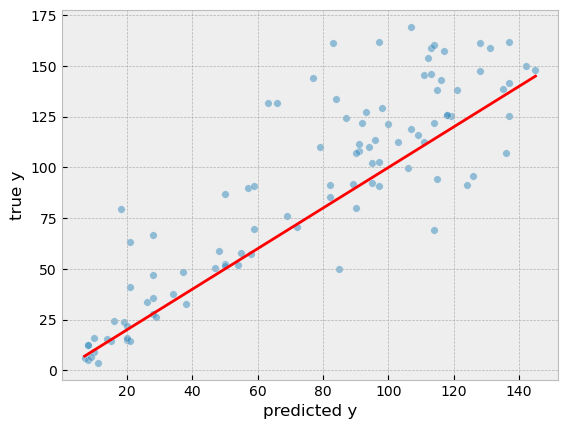

In [573]:
sns.scatterplot(x = y_test, y = y_pred  , s = 30 , alpha = 0.5)

sns.lineplot( x = [ min(y_test)  , max(y_test) ] , 
             y = [min(y_test) , max(y_test)] , color = 'red')
 

plt.xlabel('predicted y')
plt.ylabel('true y')

In [577]:
%%time
import xgboost as xgb
model_xgb = xgb.XGBRegressor(n_estimators = 20 , max_depth = 6, learning_rate = 0.1 , 
                 reg_lambda = 0.02 , gamma = 0.4 , random_state = 42 )
model_xgb.fit(X_train , y_train )

y_pred = model_xgb.predict(X_train)
metrics(y_train , y_pred, 'train')

y_pred = model_xgb.predict(X_test)
metrics(y_test , y_pred)

for train set , RMSE = 40.75 , r2_score = 64.99%
for test set , RMSE = 30.60 , r2_score = 45.79%
CPU times: total: 1.17 s
Wall time: 213 ms


In [579]:
%%time
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from scipy.stats import randint , uniform   # it returen range of dist , not single value like np.random.randint

model_xgb = xgb.XGBRegressor()
param_distributions = {
    'n_estimators': randint(50, 500),  # Number of boosting rounds (trees)
    'learning_rate': uniform(0.01, 0.3),  # Step size shrinking to prevent overfitting
    'max_depth': randint(3, 15),  # Maximum depth of a tree
    'min_child_weight': randint(1, 10),  # Minimum sum of instance weight needed in a child
    'subsample': uniform(0.5, 0.5),  # Subsample ratio of the training instances
    'colsample_bytree': uniform(0.5, 0.5),  # Subsample ratio of columns when constructing each tree
    'gamma': uniform(0, 5),  # Minimum loss reduction required to make a further partition
    'reg_alpha': uniform(0, 1),  # L1 regularization term on weights
    'reg_lambda': uniform(0, 1)  # L2 regularization term on weights
}
random_search_xgb = RandomizedSearchCV(estimator=model_xgb , param_distributions=param_distributions ,
                                   n_iter=10 , cv = 5 , scoring = 'r2' , random_state=42 , n_jobs=-1)
random_search_xgb.fit(X_train , y_train)

CPU times: total: 10.8 s
Wall time: 1min 2s


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026FDB08CB20>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000026FDCB17250>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000026FDB0776D0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000026FDCB109A0>},
                   random_state=42, scoring='r2')

In [581]:
model_fine_xgb = random_search_xgb.best_estimator_

In [583]:
y_pred = model_fine_xgb.predict(X_train)
metrics(y_train , y_pred, 'train')

y_pred = model_fine_xgb.predict(X_test)
metrics(y_test , y_pred)

for train set , RMSE = 39.98 , r2_score = 66.31%
for test set , RMSE = 32.38 , r2_score = 39.27%
